In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(test_b1, sparsity_b1, selectivity_b1, test_b50, sparsity_b50, selectivity_b50, location='best'):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ax.plot(np.linspace(1.0, 30.0, num=30), test_b1, label='batch_size 1', c='royalblue')
    ax.plot(np.linspace(1.0, 30.0, num=30), sparsity_b1, label='batch_size 1 sparsity', c='cornflowerblue')
    ax.plot(np.linspace(1.0, 30.0, num=30), selectivity_b1, label='batch_size 1 selectivity', c='lightsteelblue')
    
    ax.plot(np.linspace(1.0, 30.0, num=30), test_b50, label='batch_size 50', c='indigo')
    ax.plot(np.linspace(1.0, 30.0, num=30), sparsity_b50, label='batch_size 50 sparsity', c='darkorchid')
    ax.plot(np.linspace(1.0, 30.0, num=30), selectivity_b50, label='batch_size 50 selectivity', c='violet')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location, bbox_to_anchor=(1, 0.5))
    plt.show()

# Graph format

In [6]:
def plotter(optmizer_name, flag=False):
    sparsity_b1  = sparsity_val_extractor(f'sparsity_batchsize_1_{optmizer_name}.txt')
    sparsity_b50 = sparsity_val_extractor(f'sparsity_batchsize_50_{optmizer_name}.txt')

    selectivity_b1_avg, selectivity_b1_std   = selectivity_val_extractor(f'selectivity_batchsize_1_{optmizer_name}.txt')
    selectivity_b50_avg, selectivity_b50_std = selectivity_val_extractor(f'selectivity_batchsize_50_{optmizer_name}.txt')

    test_b1  = test_val_extractor(f'sparsity_batchsize_1_{optmizer_name}.txt')
    test_b50 = test_val_extractor(f'sparsity_batchsize_50_{optmizer_name}.txt')
    
    if flag==False:
        all_plotter(test_b1, sparsity_b1, selectivity_b1_avg, test_b50, sparsity_b50, selectivity_b50_avg)
    
    if flag==True:
        return test_b1, sparsity_b1, selectivity_b1_avg, selectivity_b1_std, test_b50, sparsity_b50, selectivity_b50_avg, selectivity_b50_std

In [7]:
sgd_test_b1,      sgd_spar_b1,      sgd_selec_b1_avg,      sgd_selec_b1_std,      sgd_test_b50,      sgd_spar_b50,      sgd_selec_b50_avg,      sgd_selec_b50_std      = plotter('SGD', flag=True)
Adadelta_test_b1, Adadelta_spar_b1, Adadelta_selec_b1_avg, Adadelta_selec_b1_std, Adadelta_test_b50, Adadelta_spar_b50, Adadelta_selec_b50_avg, Adadelta_selec_b50_std = plotter('Adadelta', flag=True)
Adagrad_test_b1,  Adagrad_spar_b1,  Adagrad_selec_b1_avg,  Adagrad_selec_b1_std,  Adagrad_test_b50,  Adagrad_spar_b50,  Adagrad_selec_b50_avg,  Adagrad_selec_b50_std  = plotter('Adagrad', flag=True)
Adam_test_b1,     Adam_spar_b1,     Adam_selec_b1_avg,     Adam_selec_b1_std,     Adam_test_b50,     Adam_spar_b50,     Adam_selec_b50_avg,     Adam_selec_b50_std     = plotter('Adam', flag=True)

assert len(sgd_test_b1) == len(Adadelta_test_b1) == len(Adagrad_test_b1) == len(Adam_test_b1)
assert len(sgd_test_b50) == len(Adadelta_test_b50) == len(Adagrad_test_b50) == len(Adagrad_test_b50)

# Plot all in one

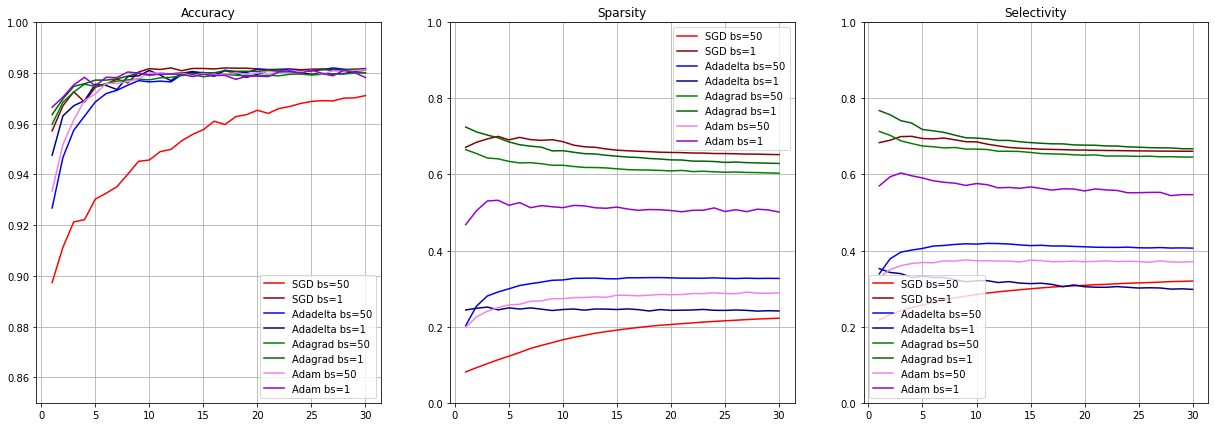

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

# accuracy plot 
ax1.plot(np.linspace(1, 30, 30), sgd_test_b50, label='SGD bs=50', c='red')
ax1.plot(np.linspace(1, 30, 30), sgd_test_b1, label='SGD bs=1', c='darkred')

ax1.plot(np.linspace(1, 30, 30), Adadelta_test_b50, label='Adadelta bs=50', c='blue')
ax1.plot(np.linspace(1, 30, 30), Adadelta_test_b1, label='Adadelta bs=1', c='darkblue')

ax1.plot(np.linspace(1, 30, 30), Adagrad_test_b50, label='Adagrad bs=50', c='green')
ax1.plot(np.linspace(1, 30, 30), Adagrad_test_b1, label='Adagrad bs=1', c='darkgreen')

ax1.plot(np.linspace(1, 30, 30), Adam_test_b50, label='Adam bs=50', c='violet')
ax1.plot(np.linspace(1, 30, 30), Adam_test_b1, label='Adam bs=1', c='darkviolet')
ax1.set_ylim([0.85, 1.0])

ax1.set_title('Accuracy')
ax1.grid()
ax1.legend(loc='best')

# sparsity  
ax2.plot(np.linspace(1, 30, 30), sgd_spar_b50, label='SGD bs=50', c='red')
ax2.plot(np.linspace(1, 30, 30), sgd_spar_b1, label='SGD bs=1', c='darkred')

ax2.plot(np.linspace(1, 30, 30), Adadelta_spar_b50, label='Adadelta bs=50', c='blue')
ax2.plot(np.linspace(1, 30, 30), Adadelta_spar_b1, label='Adadelta bs=1', c='darkblue')

ax2.plot(np.linspace(1, 30, 30), Adagrad_spar_b50, label='Adagrad bs=50', c='green')
ax2.plot(np.linspace(1, 30, 30), Adagrad_spar_b1, label='Adagrad bs=1', c='darkgreen')

ax2.plot(np.linspace(1, 30, 30), Adam_spar_b50, label='Adam bs=50', c='violet')
ax2.plot(np.linspace(1, 30, 30), Adam_spar_b1, label='Adam bs=1', c='darkviolet')
ax2.set_ylim([0, 1])

ax2.set_title('Sparsity')
ax2.grid()
ax2.legend(loc='best')


# selectivity  
ax3.plot(np.linspace(1, 30, 30), sgd_selec_b50_avg, label='SGD bs=50', c='red')
ax3.plot(np.linspace(1, 30, 30), sgd_selec_b1_avg, label='SGD bs=1', c='darkred')

ax3.plot(np.linspace(1, 30, 30), Adadelta_selec_b50_avg, label='Adadelta bs=50', c='blue')
ax3.plot(np.linspace(1, 30, 30), Adadelta_selec_b1_avg, label='Adadelta bs=1', c='darkblue')

ax3.plot(np.linspace(1, 30, 30), Adagrad_selec_b50_avg, label='Adagrad bs=50', c='green')
ax3.plot(np.linspace(1, 30, 30), Adagrad_selec_b1_avg, label='Adagrad bs=1', c='darkgreen')

ax3.plot(np.linspace(1, 30, 30), Adam_selec_b50_avg, label='Adam bs=50', c='violet')
ax3.plot(np.linspace(1, 30, 30), Adam_selec_b1_avg, label='Adam bs=1', c='darkviolet')
ax3.set_ylim([0, 1])

ax3.set_title('Selectivity')
ax3.grid()
ax3.legend(loc='lower left')

plt.show()

# Accuracy x Sparsity (or Selectivity)

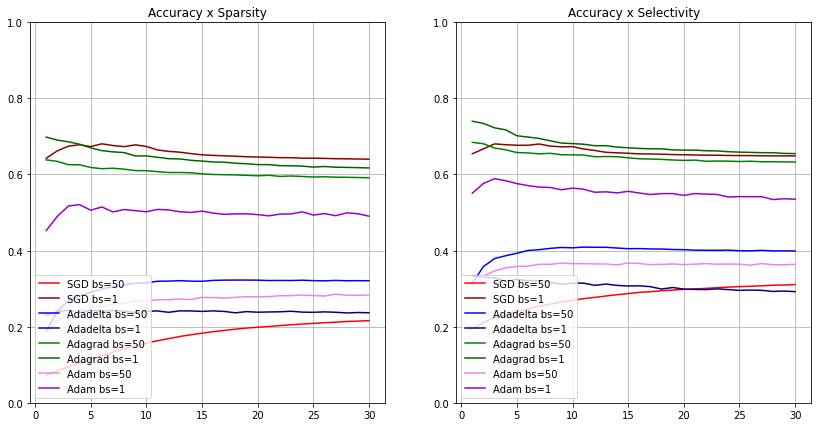

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Accuracy x Sparsity 
ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(sgd_test_b50, sgd_spar_b50)], 
         label='SGD bs=50', c='red')
ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(sgd_test_b1, sgd_spar_b1)], 
         label='SGD bs=1', c='darkred')

ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adadelta_test_b50, Adadelta_spar_b50)], 
         label='Adadelta bs=50', c='blue')
ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adadelta_test_b1, Adadelta_spar_b1)], 
         label='Adadelta bs=1', c='darkblue')

ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adagrad_test_b50, Adagrad_spar_b50)], 
         label='Adagrad bs=50', c='green')
ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adagrad_test_b1, Adagrad_spar_b1)], 
         label='Adagrad bs=1', c='darkgreen')

ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_test_b50, Adam_spar_b50)], 
         label='Adam bs=50', c='violet')
ax1.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_test_b1, Adam_spar_b1)], 
         label='Adam bs=1', c='darkviolet')
ax1.set_ylim([0, 1.0])

ax1.set_title('Accuracy x Sparsity')
ax1.grid()
ax1.legend(loc='lower left')

# Accuracy x Selectivity   
ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(sgd_test_b50, sgd_selec_b50_avg)], 
         label='SGD bs=50', c='red')
ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(sgd_test_b1, sgd_selec_b1_avg)], 
         label='SGD bs=1', c='darkred')

ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adadelta_test_b50, Adadelta_selec_b50_avg)], 
         label='Adadelta bs=50', c='blue')
ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adadelta_test_b1, Adadelta_selec_b1_avg)], 
         label='Adadelta bs=1', c='darkblue')

ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adagrad_test_b50, Adagrad_selec_b50_avg)], 
         label='Adagrad bs=50', c='green')
ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adagrad_test_b1, Adagrad_selec_b1_avg)], 
         label='Adagrad bs=1', c='darkgreen')

ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_test_b50, Adam_selec_b50_avg)], 
         label='Adam bs=50', c='violet')
ax2.plot(np.linspace(1, 30, 30), [a * b for a, b in zip(Adam_test_b1, Adam_selec_b1_avg)], 
         label='Adam bs=1', c='darkviolet')
ax2.set_ylim([0, 1])

ax2.set_title('Accuracy x Selectivity')
ax2.grid()
ax2.legend(loc='lower left')

plt.show()

# Subplots

In [10]:
def subplots(ori_sgd, ori_adadelta, ori_adagrad, ori_adam,
             bs1_sgd, bs1_adadelta, bs1_adagrad, bs1_adam):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    
    ax1.plot(np.linspace(1, 30, 30), ori_sgd, label='SGD bs=50', c='red')
    ax1.plot(np.linspace(1, 30, 30), ori_adadelta, label='Adadelta bs=50', c='blue')
    ax1.plot(np.linspace(1, 30, 30), ori_adagrad, label='Adagrad bs=50', c='green')
    ax1.plot(np.linspace(1, 30, 30), ori_adam, label='Adam bs=50', c='violet')
    ax1.set_ylim([-0.1,1.1])
    ax1.grid()
    ax1.legend(loc='best')
    
    ax2.plot(np.linspace(1, 30, 30), bs1_sgd, label='SGD bs=1', c='red')
    ax2.plot(np.linspace(1, 30, 30), bs1_adadelta, label='Adadelta bs=1', c='blue')
    ax2.plot(np.linspace(1, 30, 30), bs1_adagrad, label='Adagrad bs=1', c='green')
    ax2.plot(np.linspace(1, 30, 30), bs1_adam, label='Adam bs=1', c='violet')
    ax2.set_ylim([-0.1,1.1])
    ax2.grid()
    ax2.legend(loc='best')
    
    plt.show()

# Compare values

In [11]:
def compare(optimizer_name, flag=True):
    test_b1, sparsity_b1, selectivity_b1_avg, selectivity_b1_std, test_b50, sparsity_b50, selectivity_b50_avg, selectivity_b50_std = plotter(optimizer_name, flag=True)
    print(f'\n==============={optimizer_name}===============')
    print(f"{optimizer_name} b50: Test acc={test_b50[-1]:.3f}, Spar={sparsity_b50[-1]:.3f}, Selec avg={selectivity_b50_avg[-1]:.3f}, Selec std={selectivity_b50_std[-1]:.3f}")
    print(f"{optimizer_name} b1: Test acc={test_b1[-1]:.3f}, Spar={sparsity_b1[-1]:.3f}, Selec avg={selectivity_b1_avg[-1]:.3f}, Selec std={selectivity_b1_std[-1]:.3f}")
    print()
    print("test deviation: b1 - b50(original):", test_b1[-1] - test_b50[-1])
    print("sparsity deviation: b1 - b50(original):", sparsity_b1[-1] - sparsity_b50[-1])
    print("selectivity deviation: b1 - b50(original):", selectivity_b1_avg[-1] - selectivity_b50_avg[-1])
    print()
    print("test % difference: b1 / b50(original):", (test_b1[-1] / test_b50[-1]) * 100)
    print("sparsity % difference: b1 / b50(original):", (sparsity_b1[-1] / sparsity_b50[-1]) * 100)
    print("selectivity % difference: b1 / b50(original):", (selectivity_b1_avg[-1] / selectivity_b50_avg[-1]) * 100)

In [12]:
# 30 epoch 
print("Test accuracy / Sparsity / Selectivity on last epoch(30)\n")

compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')

Test accuracy / Sparsity / Selectivity on last epoch(30)


===============SGD===============
SGD b50: Test acc=0.971, Spar=0.222, Selec avg=0.320, Selec std=0.174
SGD b1: Test acc=0.982, Spar=0.652, Selec avg=0.661, Selec std=0.157

test deviation: b1 - b50(original): 0.010600000000000054
sparsity deviation: b1 - b50(original): 0.42985910177230835
selectivity deviation: b1 - b50(original): 0.3410234825988686

test % difference: b1 / b50(original): 101.09154566985892
sparsity % difference: b1 / b50(original): 293.3174519268916
selectivity % difference: b1 / b50(original): 206.59221322061038

===============Adadelta===============
Adadelta b50: Test acc=0.982, Spar=0.327, Selec avg=0.406, Selec std=0.173
Adadelta b1: Test acc=0.980, Spar=0.241, Selec avg=0.298, Selec std=0.226

test deviation: b1 - b50(original): -0.0014000000000000679
sparsity deviation: b1 - b50(original): -0.08548545837402344
selectivity deviation: b1 - b50(original): -0.10829548582312559

test % difference: b1 / b50(

# Subplots - test

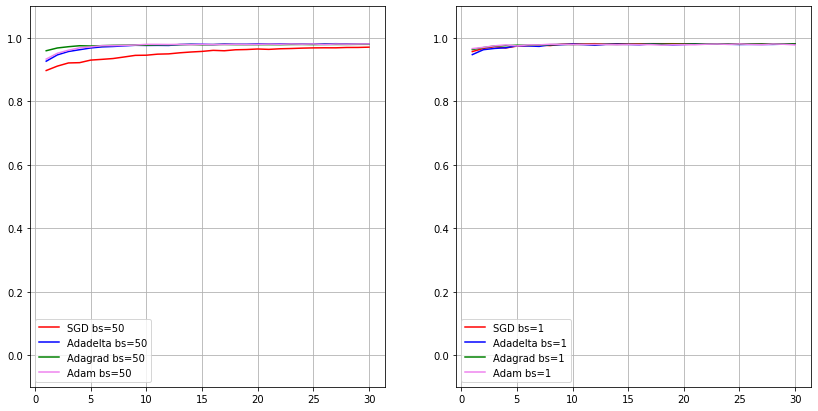

In [13]:
subplots(sgd_test_b50, Adadelta_test_b50, Adagrad_test_b50, Adam_test_b50,
         sgd_test_b1, Adadelta_test_b1, Adagrad_test_b1, Adam_test_b1)

# Subplots - sparsity

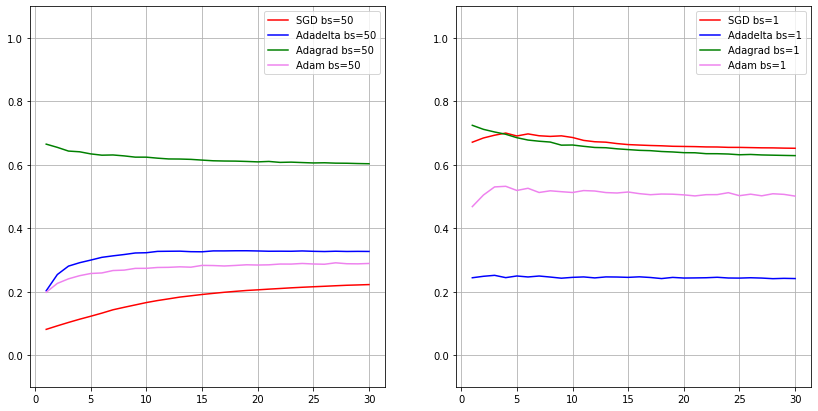

In [14]:
subplots(sgd_spar_b50, Adadelta_spar_b50, Adagrad_spar_b50, Adam_spar_b50, 
         sgd_spar_b1, Adadelta_spar_b1, Adagrad_spar_b1, Adam_spar_b1)

# Subplots - selectivity

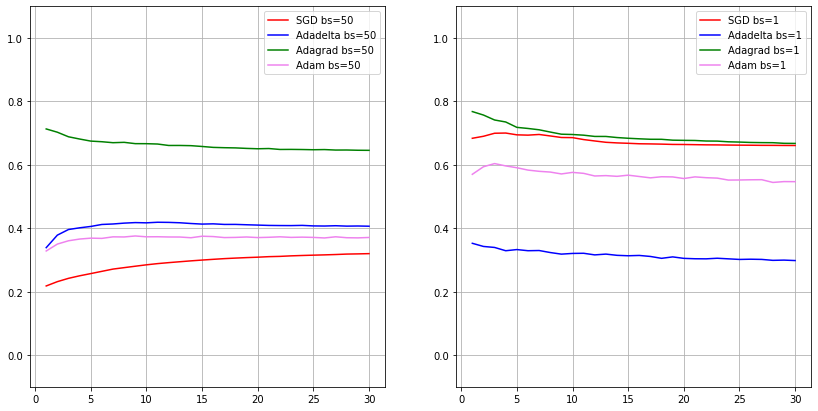

In [15]:
subplots(sgd_selec_b50_avg, Adadelta_selec_b50_avg, Adagrad_selec_b50_avg, Adam_selec_b50_avg,
         sgd_selec_b1_avg, Adadelta_selec_b1_avg, Adagrad_selec_b1_avg, Adam_selec_b1_avg)

# SGD

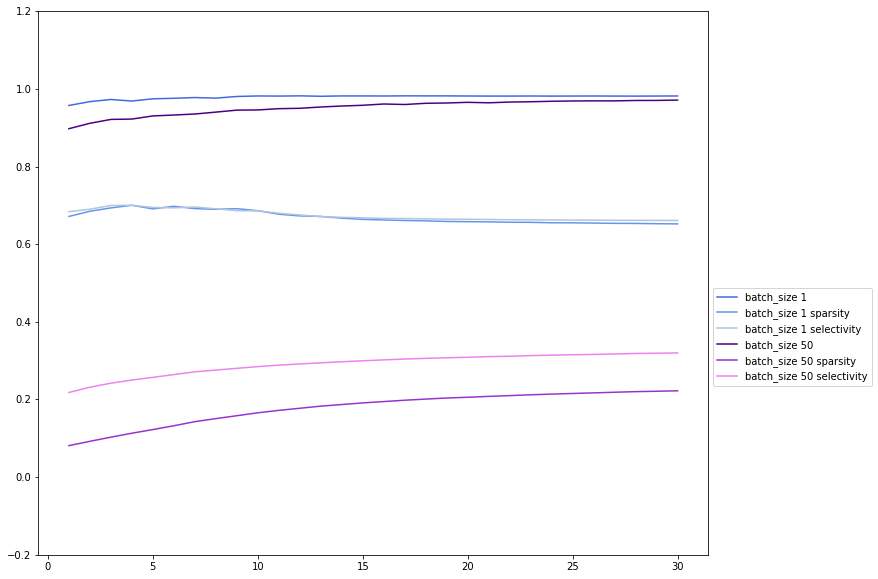

In [16]:
plotter('SGD')

# Adadelta

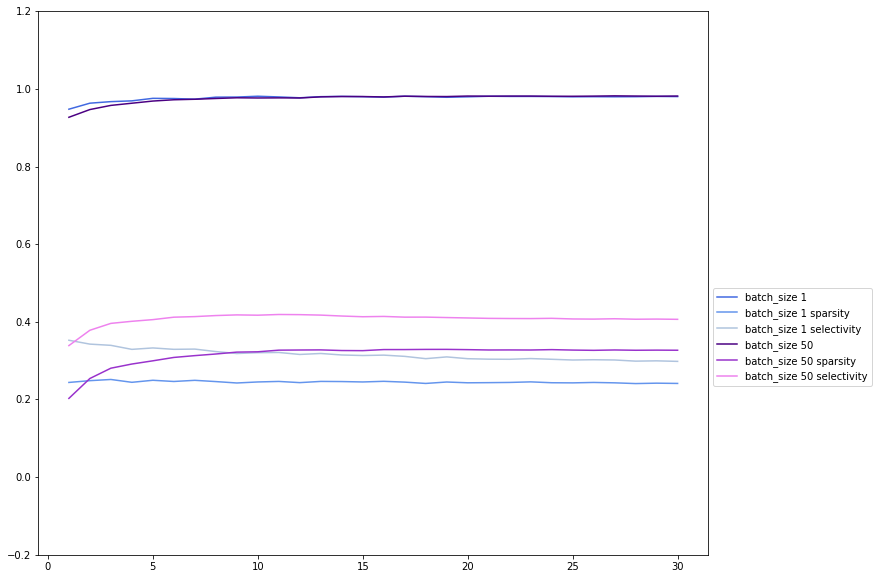

In [17]:
plotter('Adadelta')

# Adagrad

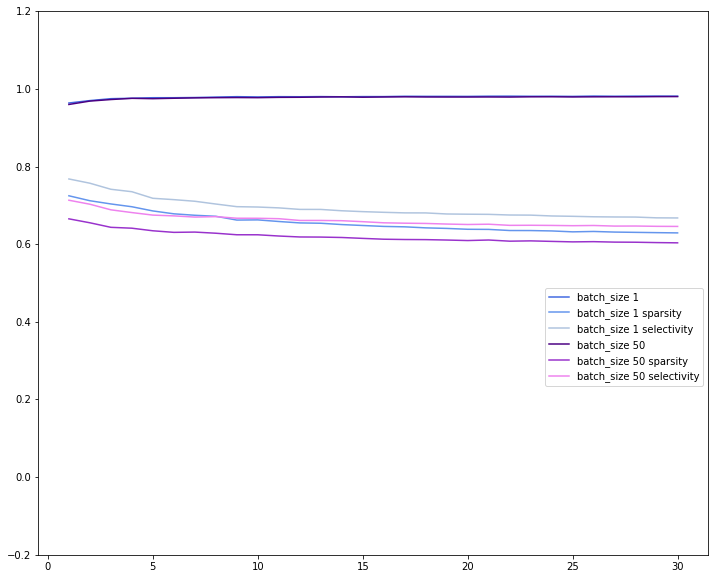

In [18]:
plotter('Adagrad')

# Adam

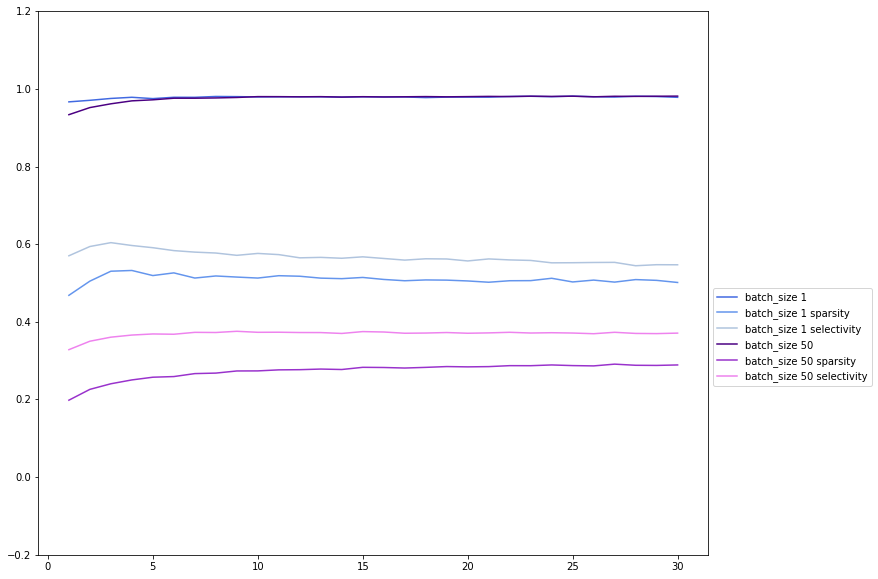

In [19]:
plotter('Adam')